# Bag of Words
### Human Science Lab Monsoon 2023

What and why BOW?

Step 0: Setup
- Python

`python3 --version`

`sudo apt-get install python3`

`pip3 --version`

`sudo apt-get install python3-pip`

 - jupyter notebook vscode extension

- Install and Load python libraries

`sudo pip3 install nltk`

# To DO:
- stemming vs lemmatising

In [9]:
import re
# from nltk.corpus import stopwords
import nltk
# nltk.download('stopwords')
# from collections import defaultdict
# from nltk.stem import SnowballStemmer
# import os

Open the text file to be read and load into a variable

In [10]:
filename = "census1931.txt"
infile = open(filename,'r')
text = infile.read()
infile.close()

In [11]:
print(text[:100])

3K

Census of India, 1931

VoL. I India
Part 1

— Report
by

J.

H.

HUTTON, C.I.E., D.Sc., f.a.s.b


In [12]:
# nltk.download('punkt')

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/radheshyam/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
myWordTokenie = nltk.word_tokenize(text)

In [16]:
print(myWordTokenie[:100])

['3K', 'Census', 'of', 'India', ',', '1931', 'VoL', '.', 'I', 'India', 'Part', '1', '—', 'Report', 'by', 'J.', 'H.', 'HUTTON', ',', 'C.I.E.', ',', 'D.Sc.', ',', 'f.a.s.b', '..', 'Corresponding', 'Member', 'of', 'the', 'Anthropologische', 'Gesellschaft', 'of', 'Vienna', 'j', '3', ')', 'i', '|', 'C', 'S', '(', 'g', '1S', '^', 'i', 'ACTUARIAL', 'REPORT', 'by', 'L.', 'S.', 'Vaidyanathan', ',', 'F.', 'I', '.', 'A.', 'DELHI', ':', 'MANAGER', 'OF', 'PUBLICATIONS', '1933', 'GOVERNMENT', 'OF', 'INDIA', 'ARCHEOLOGICAL', 'SURVEY', 'OF', 'INDIA', 'ARCHEOLOGICAL', 'LIBRARY', 'ACCESSION', 'NO._S', 'f', 'CALL', 'No', '.', '3', '/', '2', 'D', ',', 'G.A', '.', '79', '.', '0pS4lc.J.Cil', ')', '^\\', "'yRefY-", 'r/', '/', '—', '—', ',', 'Government', 'of', 'India', 'Publications', 'are']


In [17]:
print(len(myWordTokenie))

406093


In [9]:
# Tokenise
unrefinedStr = re.sub(r'\—|\'|\`|\"|\||\.|\*|\[|\{|\}|\(|\)|\]|\;|\:|\,|\^|\=|\-|\+|\_|\!|\?|\/|\>|\<|\&|\\|\#|\n', r' ', text) # removing special characters

In [10]:
print(unrefinedStr)

3K  Census of India  1931  VoL  I India Part 1    Report by  J   H   HUTTON  C I E   D Sc   f a s b    Corresponding Member of the Anthropologische Gesellschaft of Vienna  j 3    i     C S g  1S  ^  i  ACTUARIAL REPORT by  L  S  Vaidyanathan  F  I  A   DELHI  MANAGER OF PUBLICATIONS 1933  GOVERNMENT OF INDIA ARCHEOLOGICAL SURVEY OF INDIA  ARCHEOLOGICAL LIBRARY ACCESSION NO  S f  CALL No  3   2 D G A  79     0pS4lc J Cil ^    yRefY   r              Government of India Publications are obtainable from the Manager of Publications  Civil Lines  Old Delhi  and from the following Agents    EUEOPE  Office of the HIGH COMMISSIONEE FOR INDIA  India House  Aldwych  LONDON  W  C  2  And at all Booksellers   INDIA AND CEYLON     Provincial Book Depots     Superintendent  Government Press  Mount Road  Madras  BoJdiAY   Superintendent  Government Printing and Stationery  Queen’s Road  Bombay  Sind   Library attached the of the Commissioner in Sind  Karachi  Bengal  Bengal Secretariat Book Depot 

In [15]:
# tokenise
tokens = unrefinedStr.split()

In [24]:
print(len(tokens))
# for i in range(20):
#     print("####")
#     print(tokens[i])
#     print("$$$$")

388322


In [12]:
# Stopwords removal and stemming
StopWords = set(stopwords.words("english"))
StopWordsDict = defaultdict(int)
for stop in StopWords:
    StopWordsDict[stop] = 1
SnowStem = SnowballStemmer('english')

In [25]:
Bag = [SnowStem.stem(word) for word in tokens if StopWordsDict[word] != 1]

In [28]:
print(len(Bag))
# for i in range(20):
#     print("####")
#     print(Bag[i])
#     print("$$$$")

271555


In [95]:
for i in range(len(tokens)):
    tokens[i] = re.sub(r'[^\w\s]','',tokens[i])

In [97]:
tokens = [word for word in tokens if word.isalpha()]

In [99]:
tokens = [word.lower() for word in tokens]

In [101]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [102]:
tokens = [word for word in tokens if word not in stop_words]

In [104]:
# print(tokens)

In [105]:
from nltk.stem import SnowballStemmer

In [106]:
snowball = SnowballStemmer('english')

In [110]:
# print(snowball)

In [113]:
tokens = [snowball.stem(word) for word in tokens]

In [32]:
# remove numbers and make lower case
print(len(Bag))
Bag = [word for word in Bag if word.isalpha()]
Bag = [word.lower() for word in Bag]
print(len(Bag))

164583
164583


In [33]:
MyDict = {}
for word in Bag:
    if word in MyDict.keys():
        MyDict[word] += 1
    else:
        MyDict[word] = 1

In [34]:
print(MyDict)

{'census': 1084, 'india': 1251, 'vol': 34, 'i': 901, 'part': 336, 'report': 311, 'j': 354, 'h': 298, 'hutton': 12, 'c': 498, 'e': 291, 'd': 89, 'sc': 12, 'f': 366, 'b': 217, 'correspond': 100, 'member': 70, 'anthropologisch': 1, 'gesellschaft': 1, 'vienna': 2, 's': 398, 'g': 221, 'actuari': 82, 'l': 391, 'vaidyanathan': 6, 'a': 635, 'delhi': 135, 'manag': 29, 'of': 184, 'public': 117, 'govern': 126, 'archeolog': 2, 'survey': 46, 'librari': 4, 'access': 7, 'no': 86, 'call': 122, 'cil': 1, 'yrefi': 1, 'r': 416, 'obtain': 171, 'civil': 109, 'line': 51, 'old': 78, 'follow': 209, 'agent': 21, 'eueop': 1, 'offic': 90, 'high': 191, 'commissione': 1, 'for': 83, 'hous': 157, 'aldwych': 1, 'london': 7, 'w': 228, 'and': 128, 'booksel': 6, 'ceylon': 33, 'provinci': 102, 'book': 55, 'depot': 17, 'superintend': 164, 'press': 27, 'mount': 4, 'road': 71, 'madra': 405, 'bojdiay': 1, 'print': 20, 'stationeri': 8, 'queen': 2, 'bombay': 292, 'sind': 35, 'attach': 45, 'commission': 65, 'karachi': 16, 'beng

In [37]:
# Make a word cloud using this dictionary of words and their frequencies
from wordcloud import WordCloud
import matplotlib.pyplot as plt

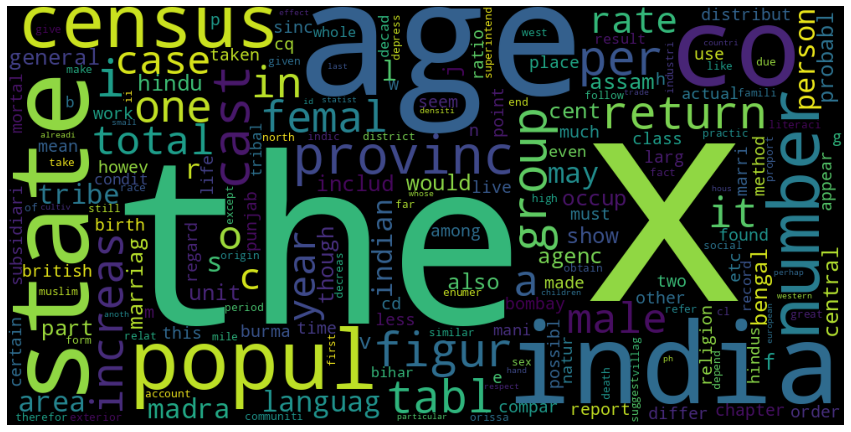

In [38]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(MyDict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

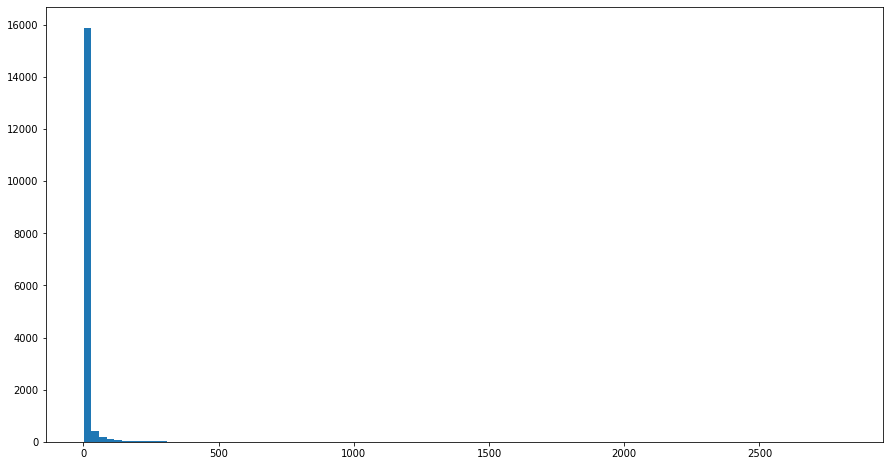

In [39]:
# Create a histogram of the frequencies of the 20 most frequent words
# import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.hist(MyDict.values(), bins = 100)
# set the x and y axis
plt.xlabel('Frequency')
plt.ylabel('Number of words')

# label for each bar
plt.title('Histogram of word frequencies')


plt.show()

